<a href="https://colab.research.google.com/github/avinashjairam/avinashjairam.github.io/blob/master/Decision_Tree_and_Random_Forest_Predicting_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [153]:
df = pd.read_csv('https://raw.githubusercontent.com/avinashjairam/avinashjairam.github.io/master/cardio.csv', delimiter=';')

In [154]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [155]:
df.shape

(70000, 13)

In [156]:
#check for missing data
df.isna().sum()

id             0
age            0
sex            0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Check for any null or missing values

In [157]:
df.isnull().values.any()

False

View basic stats

In [158]:
df.describe()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


No of patients with heart disease and those without

In [159]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

Visualize the count

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


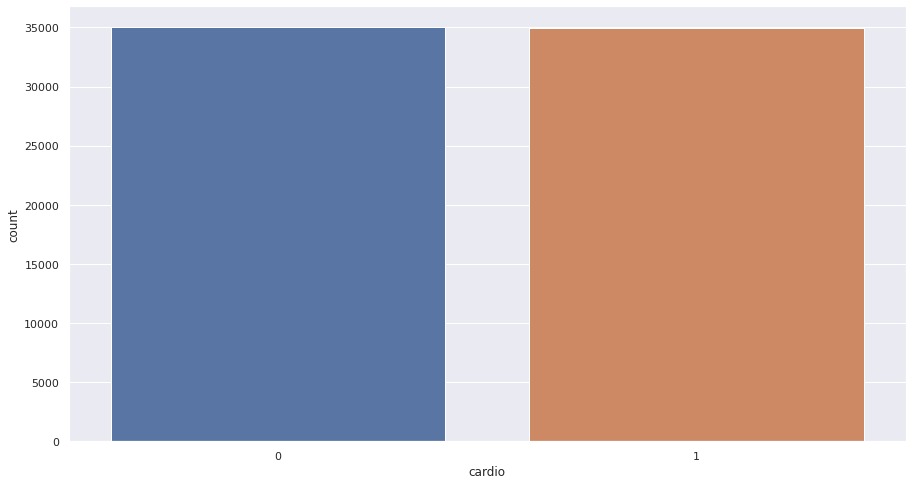

In [160]:
sns.countplot((df['cardio']))

Look at the number of people with heart disease vs number of those without

In [161]:
#create a years column
df['years'] = (df['age'] / 365).round(0)
df['years'] = pd.to_numeric(df['years'], downcast='integer')

[Text(0.5, 1.0, 'heart disease vs age')]

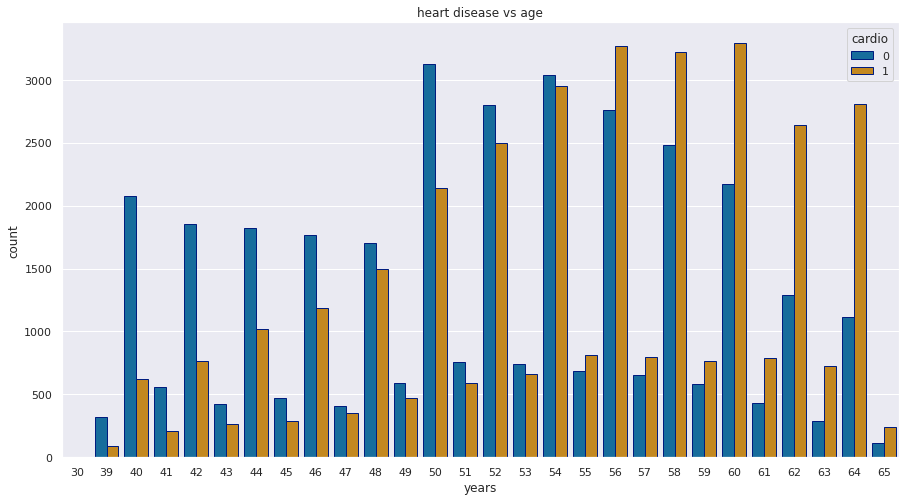

In [162]:
#visualize the data
sns.set(rc = {'figure.figsize':(15,8)})

sns.countplot(x=df['years'], hue=df['cardio'], palette = 'colorblind', edgecolor = sns.color_palette('dark', n_colors = 1)).set(title='heart disease vs age')

Get the correlation of the columns

In [163]:
df.corr()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.003050
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090
sex,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884


Making a correlation plot

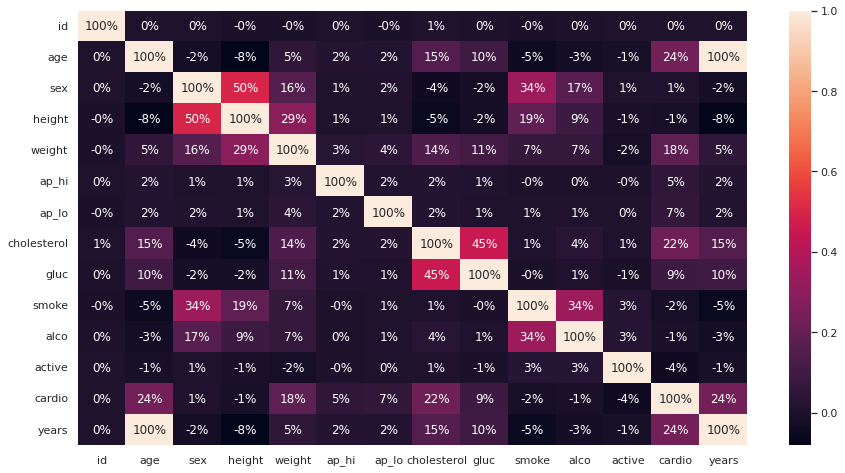

In [164]:
sns.heatmap(df.corr(), annot=True, fmt ='.0%')

Removing the Years and ID columns

In [165]:
#Remove the years and id columns
df = df.drop(['years', 'id'], axis = 1)

Splitting the dataset

In [166]:
#We are selection all the rows and columns except those of the last one
X = df.iloc[:,:-1].values

Taking a look at the features

In [167]:
X

array([[1.8393e+04, 2.0000e+00, 1.6800e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0228e+04, 1.0000e+00, 1.5600e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.8857e+04, 1.0000e+00, 1.6500e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.9066e+04, 2.0000e+00, 1.8300e+02, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.2431e+04, 1.0000e+00, 1.6300e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0540e+04, 1.0000e+00, 1.7000e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [168]:
y = df.iloc[:,-1:]

Taking a look at the labels

In [169]:
y.values

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

Splitting the Dataset

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 20)

Feature Scaling

In [171]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Training a decision tree classifier

In [172]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)



DecisionTreeClassifier()

Getting the Parameters of the Decision Tree

In [173]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Decision Tree - Making Predictions

In [174]:
y_pred_dt = dt.predict(X_test)

Decision Tree - Generating Classification Report

In [175]:
#Note - we set what the target names are
print(classification_report(y_test, y_pred_dt, target_names = ['positive', 'negative']))

              precision    recall  f1-score   support

    positive       0.64      0.64      0.64     10534
    negative       0.64      0.64      0.64     10466

    accuracy                           0.64     21000
   macro avg       0.64      0.64      0.64     21000
weighted avg       0.64      0.64      0.64     21000



Training the Random Forest Classifier

In [177]:
rf = RandomForestClassifier(n_estimators=10, criterion='gini',random_state=1)
rf.fit(X_train,y_train.values.ravel())


RandomForestClassifier(n_estimators=10, random_state=1)

Random Forest - Making Predictions and Generating Classification Report

In [178]:
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72     10534
           1       0.72      0.66      0.69     10466

    accuracy                           0.70     21000
   macro avg       0.71      0.70      0.70     21000
weighted avg       0.71      0.70      0.70     21000



Can try a logistic regression model on this dataset?